In [2]:
#Importing requiered libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/Users/sachin/Documents/AI filter test/Food_Nutrition_Model/stigler.csv")
print(df.head())
print(df.columns)

                 commodity    unit  price_cents  calories  protein_g  \
0   Wheat Flour (Enriched)  10 lb.         36.0      44.7       1411   
1                 Macaroni   1 lb.         14.1      11.6        418   
2  Wheat Cereal (Enriched)  28 oz.         24.2      11.8        377   
3              Corn Flakes   8 oz.          7.1      11.4        252   
4                Corn Meal   1 lb.          4.6      36.0        897   

   calcium_g  iron_mg  vitamin_a_iu  vitamin_b1_mg  vitamin_b2_mg  niacin_mg  \
0        2.0      365           0.0           55.4           33.3        441   
1        0.7       54           0.0            3.2            1.9         68   
2       14.4      175           0.0           14.4            8.8        114   
3        0.1       56           0.0           13.5            2.3         68   
4        1.7       99          30.9           17.4            7.9        106   

   vitamin_c_mg  
0             0  
1             0  
2             0  
3             

In [4]:
features = df[['calories' , 'protein_g', 'calcium_g' , 'price_cents']].copy()
features = features.dropna()

In [5]:
scaler = StandardScaler()
scaler = scaler.fit_transform(features)

In [6]:
#3 catagories
kmeans = KMeans(n_clusters = 3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaler)

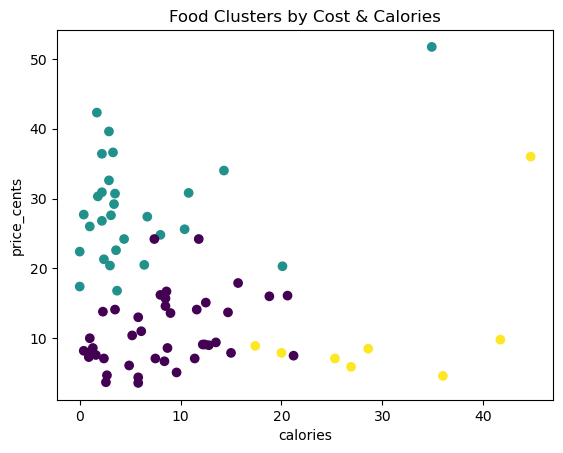

In [7]:
plt.scatter(df['calories'], df['price_cents'], c=df['Cluster'])
plt.xlabel('calories')
plt.ylabel('price_cents')
plt.title('Food Clusters by Cost & Calories')
plt.show()

In [8]:
for i in range(3):
    print(f"\nCluster {i} Foods:")
    print(df[df['Cluster'] == i]['commodity'].head(10))  # top 10 foods per cluster


Cluster 0 Foods:
1                    Macaroni
2     Wheat Cereal (Enriched)
3                 Corn Flakes
6                        Rice
8      White Bread (Enriched)
9           Whole Wheat Bread
10                  Rye Bread
12              Soda Crackers
13                       Milk
14      Evaporated Milk (can)
Name: commodity, dtype: object

Cluster 1 Foods:
11       Pound Cake
15           Butter
17             Eggs
22           Crisco
24    Sirloin Steak
25      Round Steak
26        Rib Roast
27      Chuck Roast
29     Liver (Beef)
30      Leg of Lamb
Name: commodity, dtype: object

Cluster 2 Foods:
0     Wheat Flour (Enriched)
4                  Corn Meal
5               Hominy Grits
7                Rolled Oats
23                      Lard
66               Peas, Dried
67         Lima Beans, Dried
68         Navy Beans, Dried
Name: commodity, dtype: object


In [9]:
# === Save the model and scaler for reuse ===
#joblib.dump(kmeans, 'meal_kmeans_model.pkl')
#joblib.dump(scaler, 'meal_scaler.pkl')

# === CLI script starts here ===
# Load model and scaler
#kmeans = joblib.load('meal_kmeans_model.pkl')
#scaler = joblib.load('meal_scaler.pkl')

# User input
cal = float(input("Enter Calories: "))
prot = float(input("Enter Protein (g): "))
fat = float(input("Enter Fat (g): "))
cost = float(input("Enter Cost ($): "))

# Format and scale
user_data = np.array([[cal, prot, fat, cost]])
#user_scaled = scaler.transform(user_data)

# Predict cluster
cluster = kmeans.predict(user_data)[0]

cluster_labels = {
    0: "Low Cost & Balanced",
    1: "High Protein & Expensive",
    2: "High Calorie & Low Protein"
}
print(f"\nThis meal is classified as: {cluster_labels[cluster]}")



This meal is classified as: High Calorie & Low Protein
